In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.morphology import area_opening
from skimage.exposure import histogram
from skimage.filters import threshold_otsu
import nibabel as nib
import matplotlib.pyplot as plt

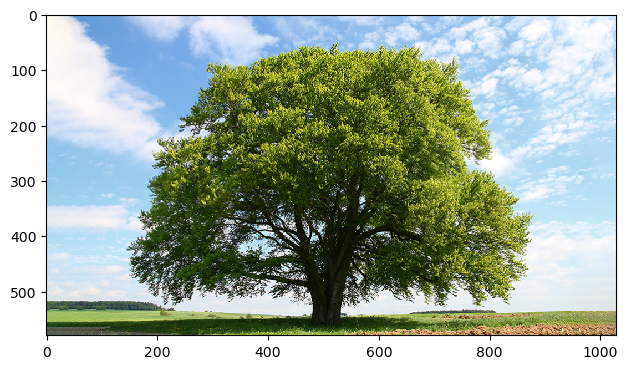

In [7]:



# Define the image paths
image_path_flair = r'D:\code\archive_4\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_flair.nii'
image_path_seg = r'D:\code\archive_4\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_seg.nii'
image_path_t1 = r"D:\code\archive_4\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t1.nii"
image_path_t1ce = r"D:\code\archive_4\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t1ce.nii"
image_path_t2 = r"D:\code\archive_4\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t2.nii"

# Load the image data for each modality
flair_img = nib.load(image_path_flair)
seg_img = nib.load(image_path_seg)
t1_img = nib.load(image_path_t1)
t1ce_img = nib.load(image_path_t1ce)
t2_img = nib.load(image_path_t2)

# Extract data as numpy ndarray
flair_data = flair_img.get_fdata()
seg_data = seg_img.get_fdata()
t1_data = t1_img.get_fdata()
t1ce_data = t1ce_img.get_fdata()
t2_data = t2_img.get_fdata()

# Get the image shape
height, width, depth = flair_data.shape

# Select a random layer number
layer = np.random.randint(0, depth)

# Define a channel to look at
channels = [flair_data, t1_data, t1ce_data, t2_data, seg_data]
channel_names = ['FLAIR', 'T1', 'T1ce', 'T2', 'Segmentation']

# Create subplots for each modality
fig, axes = plt.subplots(1, len(channels), figsize=(15, 3))

for i, (data, name) in enumerate(zip(channels, channel_names)):
    axes[i].imshow(data[:, :, layer], cmap='gray')
    axes[i].set_title(name)
    axes[i].axis('off')

plt.show()

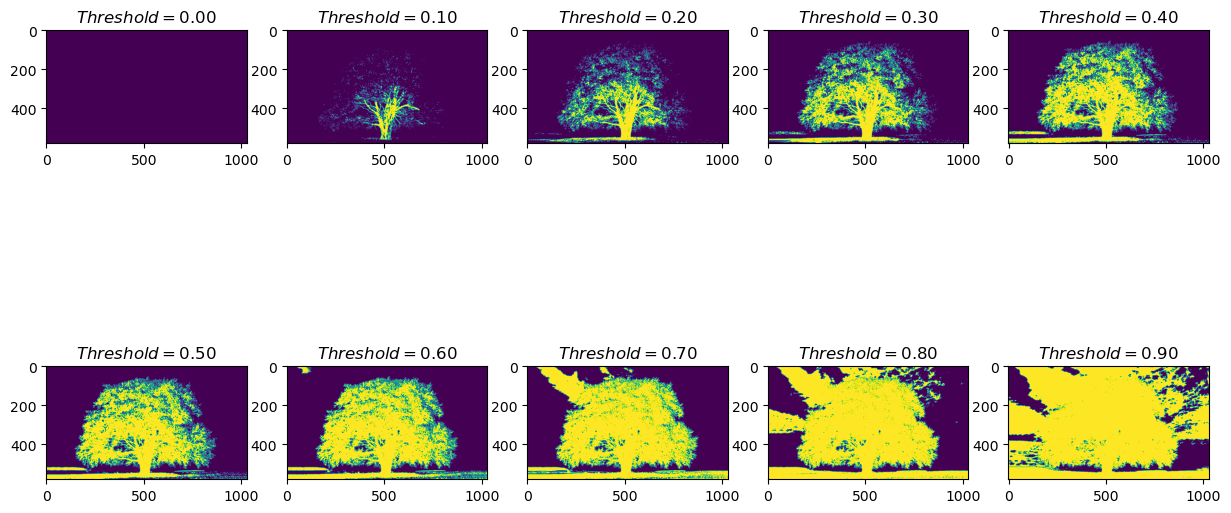

In [21]:
th_values = np.linspace(0, 1, 11)
fig, axis = plt.subplots(2, 5, figsize=(15,8))
chico_gray = rgb2gray(chico)
for th, ax in zip(th_values, axis.flatten()):
    
    chico_binarized = chico_gray < th
    ax.imshow(chico_binarized)
    ax.set_title('$Threshold = %.2f$' % th)

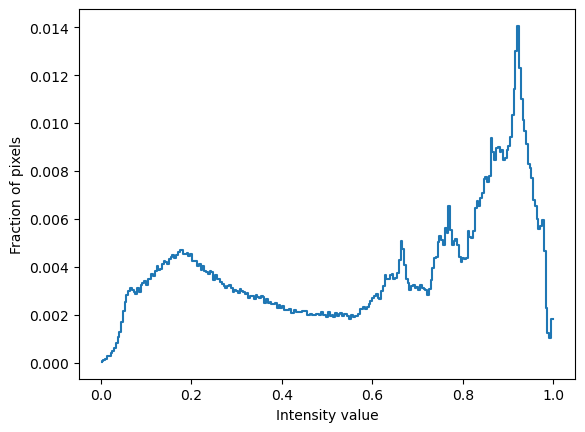

In [9]:
freq, bins = histogram(chico_gray)
plt.step(bins, freq*1.0/freq.sum())
plt.xlabel('Intensity value')
plt.ylabel('Fraction of pixels');

Otsu’s method assumes that the image is composed of a background and a foreground. This method works by minimizing the intra-class variance or maximizing the inter-class variance. Let’s see how this works.

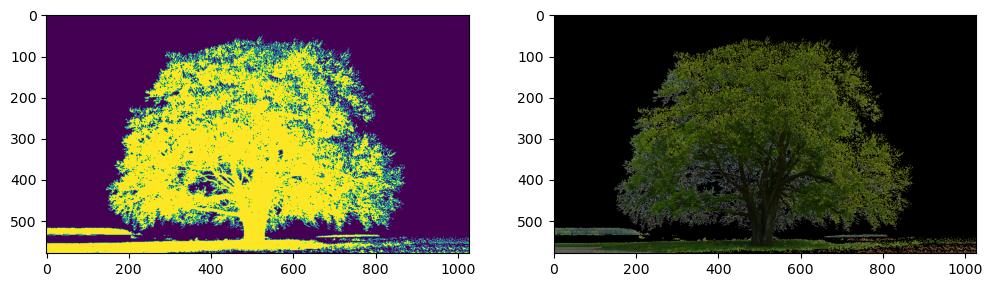

In [10]:
def masked_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])
fig, ax = plt.subplots(1, 2, figsize=(12,6))
thresh = threshold_otsu(chico_gray)
chico_otsu  = chico_gray < thresh
ax[0].imshow(chico_otsu)
filtered = masked_image(chico, chico_otsu)
ax[1].imshow(filtered)

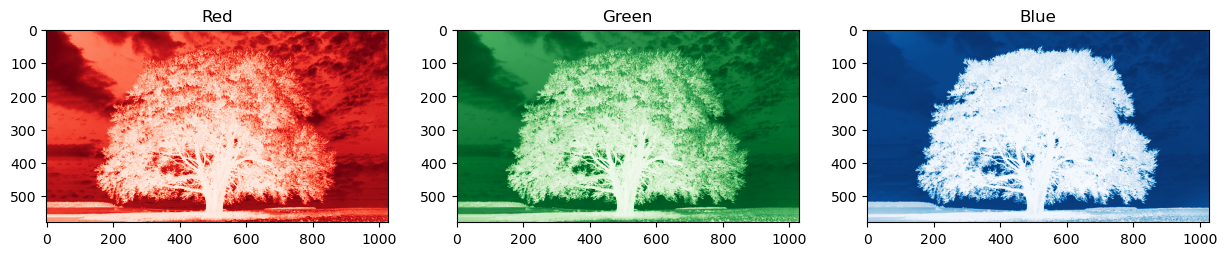

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))
ax[0].imshow(chico[:,:,0], cmap='Reds')
ax[0].set_title('Red')
ax[1].imshow(chico[:,:,1], cmap='Greens')
ax[1].set_title('Green')
ax[2].imshow(chico[:,:,2], cmap='Blues')
ax[2].set_title('Blue');

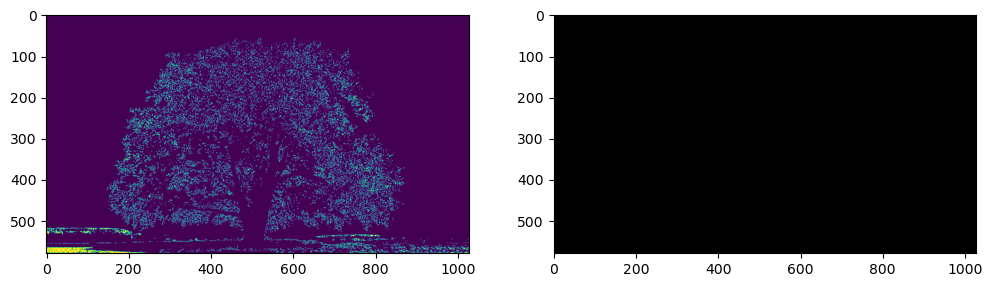

In [12]:
figure, ax = plt.subplots(1,2, figsize=(12,6))
chico_red = chico[:,:,0]
chico_green = chico[:,:,1]
chico_blue = chico[:,:,2]
binarized = ((chico_red < 200) & (chico_red > 75) & 
             (chico_green < 120) & (chico_green > 50) & 
             (chico_blue > 20))
opened = area_opening(binarized, 5000)
ax[0].imshow(binarized)
ax[1].imshow(masked_image(chico, opened))

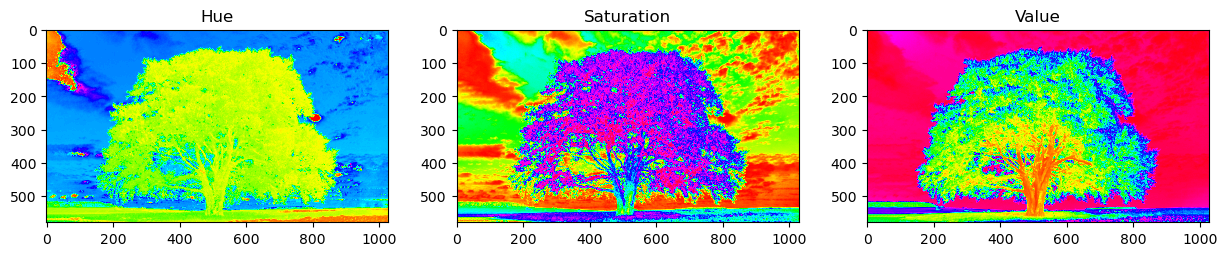

In [14]:
chico_hsv = rgb2hsv(chico)
fig, ax = plt.subplots(1, 3, figsize=(15,6))
ax[0].imshow(chico_hsv[:,:,0], cmap='hsv')
ax[0].set_title('Hue')
ax[1].imshow(chico_hsv[:,:,1], cmap='hsv')
ax[1].set_title('Saturation')
ax[2].imshow(chico_hsv[:,:,2], cmap='hsv')
ax[2].set_title('Value');

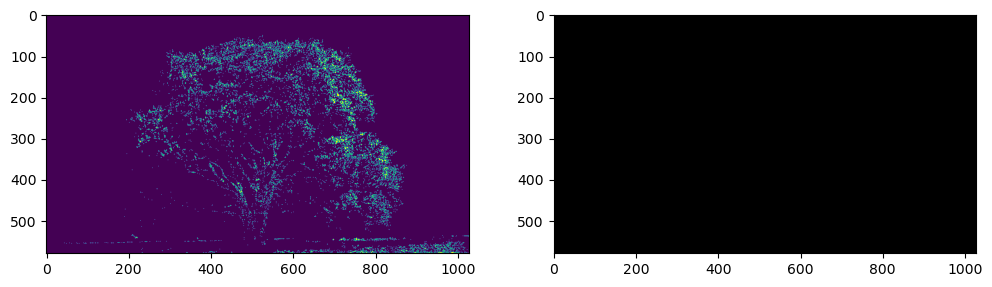

In [15]:
figure, ax = plt.subplots(1,2, figsize=(12,6))
chico_hue = chico_hsv[:,:,0] 
chico_sat = chico_hsv[:,:,1]
chico_val = chico_hsv[:,:,2]
binarized_hsv = ((chico_hue < 0.18) & (chico_hue > 0.05) & 
                 (chico_sat > 0.55)  & (chico_sat < 0.80))
opened = area_opening(binarized_hsv, 5000)
ax[0].imshow(binarized_hsv)
ax[1].imshow(masked_image(chico, opened))

https://medium.com/swlh/image-processing-with-python-image-segmentation-using-thresholding-methods-423ecdaf8ab4